In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Cargar el dataset

metadata_path = '/Users/luiseduardogarciablanco/Desktop/nueva data cancer/prueba_data_16_20/dataset_16_20.csv'
metadata = pd.read_csv(metadata_path)  
#Asegúrate de que la columna 'image_id' tenga la extensión '.jpg'
metadata['image_id'] = metadata['image_id'].apply(lambda x: x if x.endswith('.jpg') else f"{x}.jpg")

# Establecer la columna 'image_id' como índice
metadata.set_index('image_id', inplace=True)



# Mostrar información básica del dataset
print (metadata.head())
print(metadata['target'].value_counts())

                     sex  age_approx anatom_site_general  target
image_id                                                        
16_ISIC_0000001.jpg  NaN         NaN                 NaN       0
16_ISIC_0000002.jpg  NaN         NaN                 NaN       1
16_ISIC_0000004.jpg  NaN         NaN                 NaN       1
16_ISIC_0000006.jpg  NaN         NaN                 NaN       0
16_ISIC_0000007.jpg  NaN         NaN                 NaN       0
target
0    64604
1     6766
Name: count, dtype: int64


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71370 entries, 16_ISIC_0000001.jpg to 20_ISIC_9999806.jpg
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  58007 non-null  object 
 1   age_approx           57951 non-null  float64
 2   anatom_site_general  55298 non-null  object 
 3   target               71370 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_86697/4151913827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_nan', data=metadata, order=value_counts.index, palette=colors)


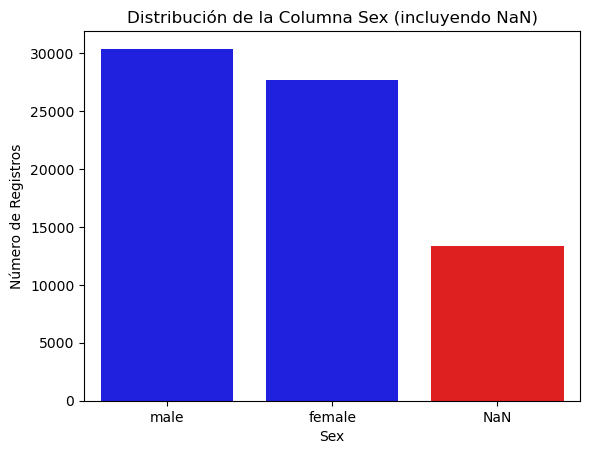

In [8]:
# graficamos para verificar los datos de la columna "sex" incluyendo valores NaN como tercera columna

# Agregar una categoría 'NaN' para los valores faltantes en 'sex'
metadata['sex_nan'] = metadata['sex'].fillna('NaN')

# Contar la frecuencia de cada categoría en 'sex_nan'
value_counts = metadata['sex_nan'].value_counts()

# Definir los colores para cada categoría, asignando rojo ('red') a 'NaN'
colors = ['red' if category == 'NaN' else 'blue' for category in value_counts.index]

# Crear un gráfico de barras de la distribución de 'sex', incluyendo 'NaN'
sns.countplot(x='sex_nan', data=metadata, order=value_counts.index, palette=colors)
plt.title('Distribución de la Columna Sex (incluyendo NaN)')
plt.xlabel('Sex')
plt.ylabel('Número de Registros')
plt.show()

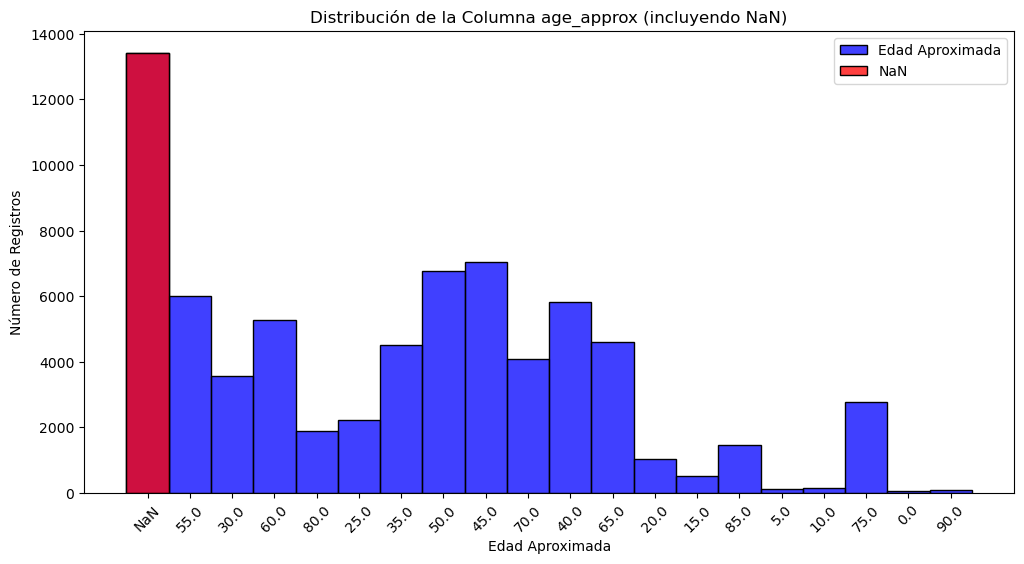

In [9]:
#Graficaremos para visualizar la explicabilidad de los Datos

# Crear una columna 'age_approx_nan' para marcar los valores nulos
metadata['age_approx_nan'] = metadata['age_approx'].astype(str).replace('nan', 'NaN')


# Crear un histograma de la distribución de 'age_approx', incluyendo 'NaN'
plt.figure(figsize=(12, 6))

sns.histplot(data=metadata, x='age_approx_nan', discrete=True, kde=False, bins=30, color='blue', label='Edad Aproximada')

# Añadir una segunda serie para la categoría 'NaN' y colorearla en rojo
for age in metadata['age_approx_nan'].unique():
    if age == 'NaN':
        sns.histplot(metadata[metadata['age_approx_nan'] == 'NaN'], x='age_approx_nan', discrete=True, kde=False, bins=30, color='red', label='NaN')

# Añadir título y etiquetas
plt.title('Distribución de la Columna age_approx (incluyendo NaN)')
plt.xlabel('Edad Aproximada')
plt.ylabel('Número de Registros')

# Añadir leyenda
plt.legend()

# Ajustar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

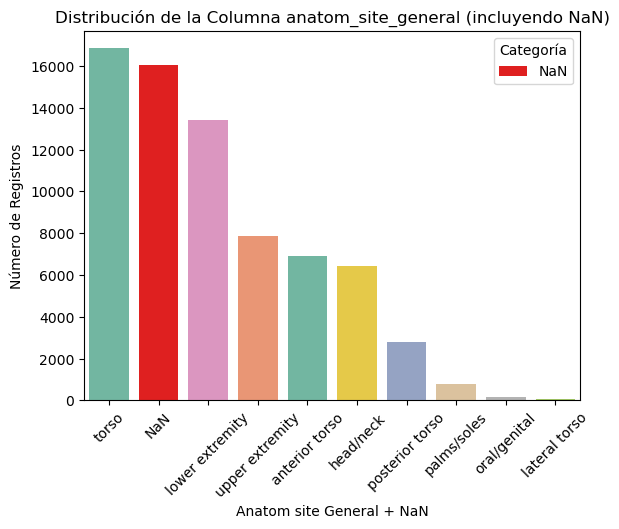

In [10]:
# Crear una columna 'anatom_site_general_nan' para marcar los valores nulos

metadata['anatom_site_general_nan'] = metadata['anatom_site_general'].astype(str).replace('nan', 'NaN')

# Graficar los valores no nulos en un color

sns.countplot(data=metadata[metadata['anatom_site_general_nan'] != 'NaN'], 
              x='anatom_site_general_nan', 
              order=metadata['anatom_site_general_nan'].value_counts().index, 
              palette='Set2', 
              hue='anatom_site_general_nan')

# Graficar los valores nulos en rojo
sns.countplot(data=metadata[metadata['anatom_site_general_nan'] == 'NaN'], 
              x='anatom_site_general_nan', 
              order=['NaN'], 
              color='red', 
              label='NaN')

# Añadir título y etiquetas
plt.title('Distribución de la Columna anatom_site_general (incluyendo NaN)')
plt.xlabel('Anatom site General + NaN')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.legend(title='Categoría')

# Mostrar el gráfico
plt.show()

In [14]:
#eliminamos las columnas generadas para la explicabilidad de los datos NaN dentro de nuestro dataset

# Lista de columnas a eliminar
columnas_a_eliminar = ['sex_nan', 'age_approx_nan', 'anatom_site_general_nan']

# Eliminar las columnas del DataFrame
metadata = metadata.drop(columns=columnas_a_eliminar)

# Verificar que las columnas han sido eliminadas
print(metadata.head())

                         sex  age_approx anatom_site_general  target
image_id                                                            
16_ISIC_0000001.jpg  Unknown          -1             Unknown       0
16_ISIC_0000002.jpg  Unknown          -1             Unknown       1
16_ISIC_0000004.jpg  Unknown          -1             Unknown       1
16_ISIC_0000006.jpg  Unknown          -1             Unknown       0
16_ISIC_0000007.jpg  Unknown          -1             Unknown       0


como hay valores NaN en nuestro dataset, pero inciden en datos positivos en nuestra variable target, los imputaremos como valors "Unknown"

Imputación como “Unknown”: Es una buena estrategia si el modelo puede beneficiarse de distinguir entre datos faltantes y valores conocidos. Puede ser especialmente relevante cuando los valores faltantes tienen una relación con la variable objetivo.

esto nos será de mayor utilidad para usar Embeddings como alternativa al OneHotEncodding

En redes neuronales, una opción más avanzada es usar embeddings en lugar de One-Hot Encoding. Los embeddings son especialmente útiles cuando tienes muchas categorías, ya que permiten representar cada categoría en un espacio de menor dimensionalidad, conservando relaciones semánticas.


In [11]:

# Imputar valores faltantes
metadata['sex'].fillna('Unknown', inplace=True)
metadata['age_approx'].fillna(-1, inplace=True)  # Usar -1 o un valor especial para indicar 'missing'
metadata['anatom_site_general'].fillna('Unknown', inplace=True)


In [12]:
# Convertir 'age_approx' a entero
metadata['age_approx'] = metadata['age_approx'].astype(int)

In [13]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71370 entries, 16_ISIC_0000001.jpg to 20_ISIC_9999806.jpg
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sex                      71370 non-null  object
 1   age_approx               71370 non-null  int64 
 2   anatom_site_general      71370 non-null  object
 3   target                   71370 non-null  int64 
 4   sex_nan                  71370 non-null  object
 5   age_approx_nan           71370 non-null  object
 6   anatom_site_general_nan  71370 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.4+ MB


In [38]:
metadata

,sex,age_approx,anatom_site_general,target
image_id,,,,
16_ISIC_0000001.jpg,Unknown,-1,Unknown,0
16_ISIC_0000002.jpg,Unknown,-1,Unknown,1
16_ISIC_0000004.jpg,Unknown,-1,Unknown,1
16_ISIC_0000006.jpg,Unknown,-1,Unknown,0
16_ISIC_0000007.jpg,Unknown,-1,Unknown,0
...,...,...,...,...
20_ISIC_9999134.jpg,male,50,torso,0
20_ISIC_9999320.jpg,male,65,torso,0
20_ISIC_9999515.jpg,male,20,lower extremity,0


In [42]:
metadata.to_csv('/Users/luiseduardogarciablanco/Desktop/nueva data cancer/prueba_data_16_20/dataset_16_20_emb.csv', index=True)


aqui vemos como esta el dataset correspondiente a los años 2016 - 2020, de todas maneras para entrenar los modelos de imagenes vs target, se tomara solamente la variable target, descartando el resto del dataset